# Airplane Price Prediction 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

In [89]:
df = pd.read_csv("C:/Users/Bata/Downloads/airplane_price_dataset.csv")

# Display basic info

In [54]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model                       12377 non-null  object 
 1   Production_Year             12377 non-null  int64  
 2   Number_of_Engines           12377 non-null  int64  
 3   Engine_Type                 12377 non-null  object 
 4   Capacity                    12377 non-null  int64  
 5   Range_In_KM                 12377 non-null  int64  
 6   Fuel_Consumption_in_L/hour  12377 non-null  float64
 7   Hourly_Maintenance_Cost     12377 non-null  float64
 8   Age                         12377 non-null  int64  
 9   Sales_Region                12377 non-null  object 
 10  Price_in_$                  12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


None

In [55]:
display(df.head())

,Model,Production_Year,Number_of_Engines,Engine_Type,Capacity,Range_In_KM,Fuel_Consumption_in_L/hour,Hourly_Maintenance_Cost,Age,Sales_Region,Price_in_$
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asia,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Europe,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Australia,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Australia,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,South America,2.037981e+05


# Standard Deviation Analysis

In [56]:
std_dev = df.select_dtypes(include=['int64', 'float64']).std()

# Plot Standard Deviation

In [57]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='None'>

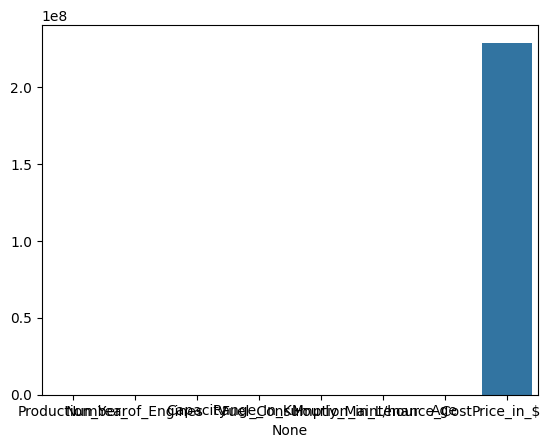

In [58]:
sns.barplot(x=std_dev.index, y=std_dev.values)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

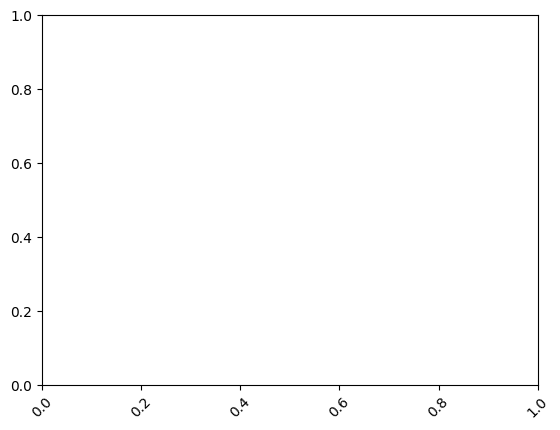

In [61]:
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Standard Deviation of Numerical Features')

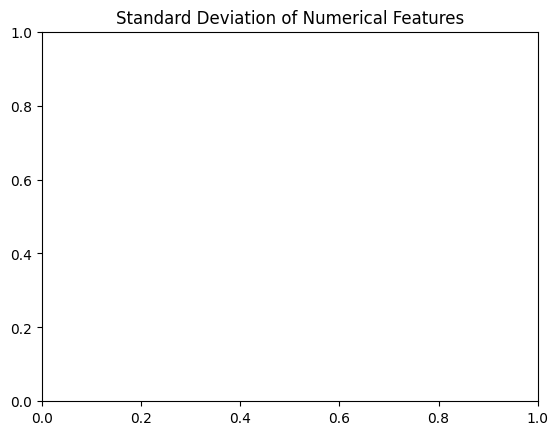

In [62]:
plt.title("Standard Deviation of Numerical Features")

Text(0, 0.5, 'Standard Deviation')

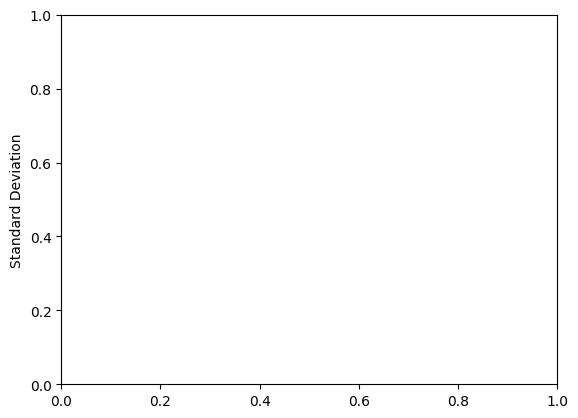

In [63]:
plt.ylabel("Standard Deviation")

In [31]:
plt.show()

# Histograms for numerical features

In [90]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

array([[<Axes: title={'center': 'Production_Year'}>,
        <Axes: title={'center': 'Number_of_Engines'}>,
        <Axes: title={'center': 'Capacity'}>],
       [<Axes: title={'center': 'Range_In_KM'}>,
        <Axes: title={'center': 'Fuel_Consumption_in_L/hour'}>,
        <Axes: title={'center': 'Hourly_Maintenance_Cost'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Price_in_$'}>, <Axes: >]], dtype=object)

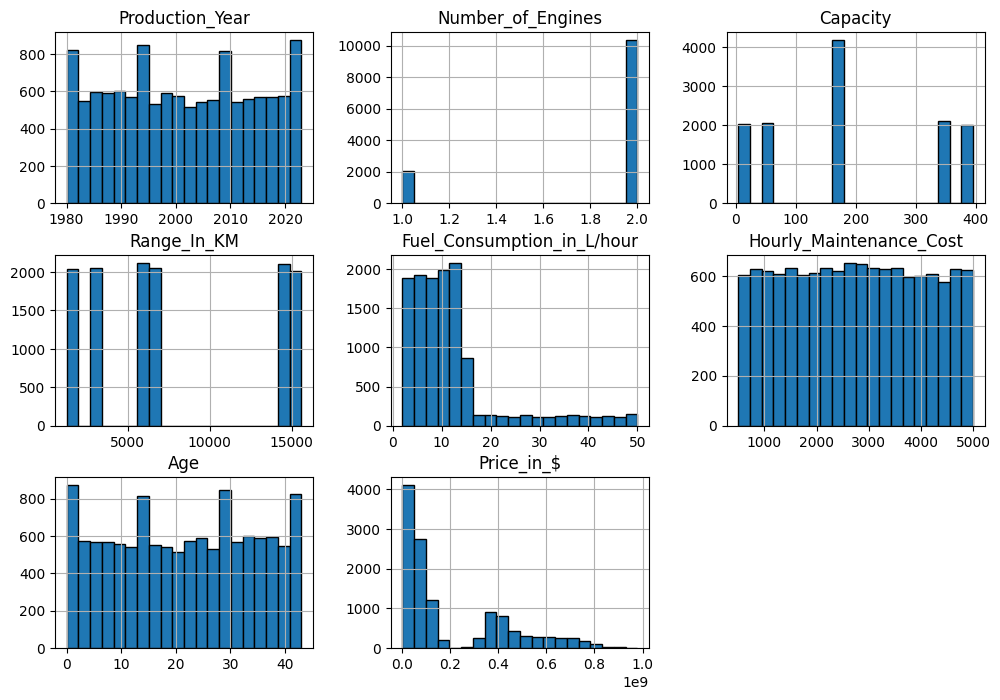

In [91]:
df.hist(bins=20, figsize=(12, 8), edgecolor='black')

In [92]:
plt.suptitle("Feature Distributions")

Text(0.5, 0.98, 'Feature Distributions')

<Figure size 640x480 with 0 Axes>

In [93]:
plt.show()

# Boxplots for outlier detection

In [94]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: >

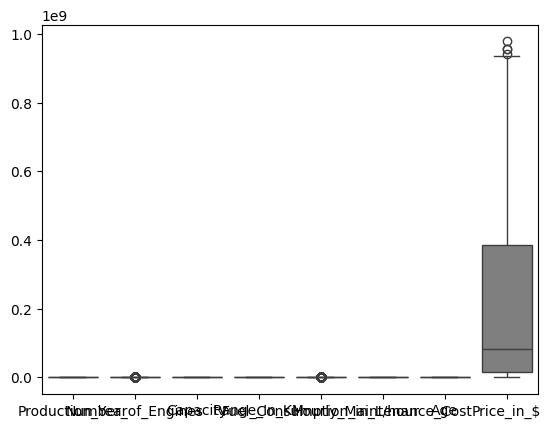

In [95]:
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

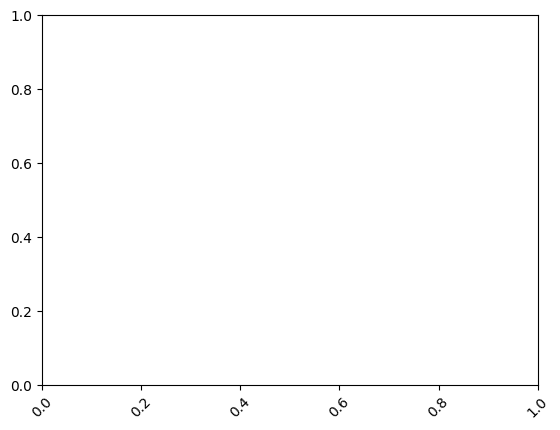

In [96]:
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Boxplots of Numerical Features')

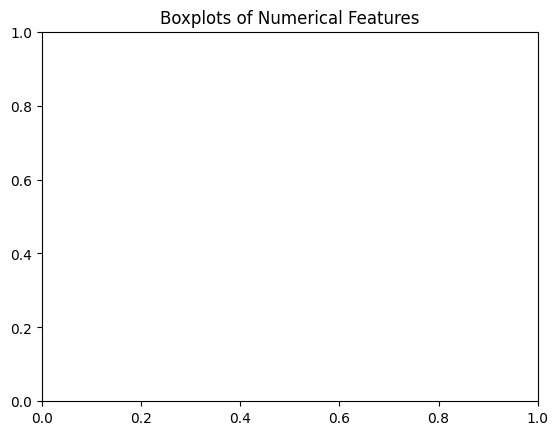

In [97]:
plt.title("Boxplots of Numerical Features")

In [98]:
plt.show()

# Classification: Predicting Engine Type

In [64]:
encoder = LabelEncoder()

In [65]:
df['Engine_Type'] = encoder.fit_transform(df['Engine_Type'])

In [66]:
X_class = df[['Production_Year', 'Number_of_Engines', 'Capacity', 'Range_In_KM',
              'Fuel_Consumption_in_L/hour', 'Hourly_Maintenance_Cost', 'Age']]

In [67]:
y_class = df['Engine_Type']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [69]:
clf = RandomForestClassifier()

In [70]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred_class = clf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred_class)

In [73]:
print(f"Classification Accuracy (Engine Type Prediction): {accuracy:.2f}")

Classification Accuracy (Engine Type Prediction): 1.00


# Feature importance for classification

In [99]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='None'>

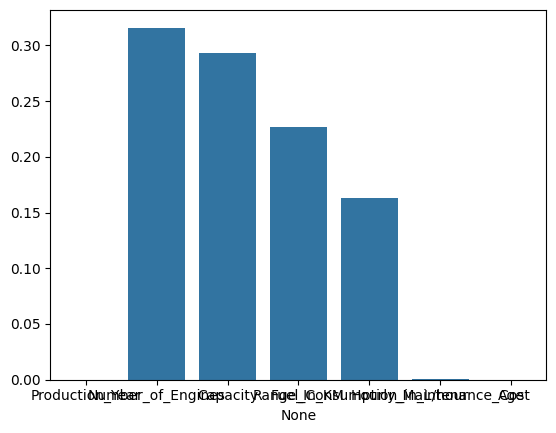

In [100]:
sns.barplot(x=X_class.columns, y=clf.feature_importances_)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

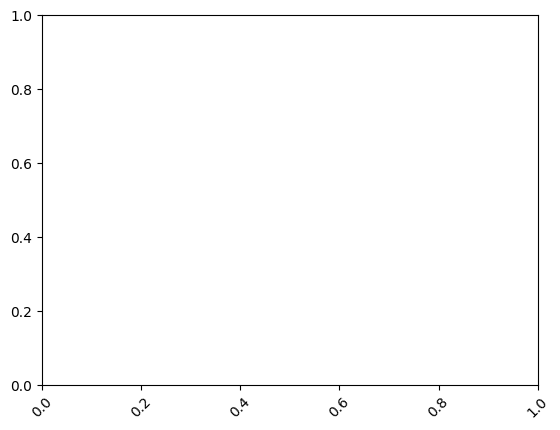

In [101]:
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Feature Importance in Classification')

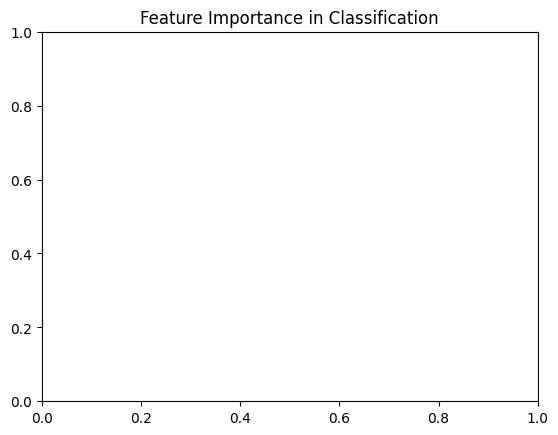

In [102]:
plt.title("Feature Importance in Classification")

In [103]:
plt.show()

# Histograms for classification features

In [104]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

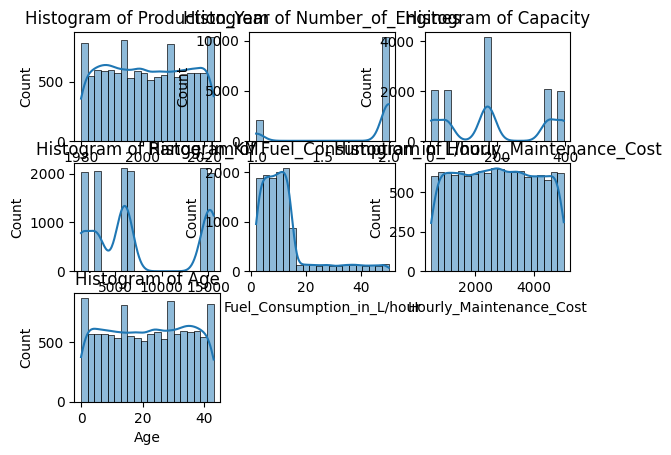

In [105]:
for i, col in enumerate(X_class.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")

In [106]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [107]:
plt.show()

In [119]:
plt.show()